## Cancer Diagnosis Prediction

#### Project Introduction

This project focuses on predicting cancer diagnosis using machine learning techniques. By analyzing patient data and relevant features, we build a logistic regression model to classify tumors as malignant or benign. The workflow includes data preprocessing, exploratory analysis, model training, evaluation, and visualization to ensure accurate and reliable predictions for medical diagnosis.

## Importing the dependencies


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

## About the dataset


The cancer prediction dataset is imported from kaggle - https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset/data.

The `cancer_data` dataset contains patient information and various health-related features used to predict cancer diagnosis. It includes attributes such as age, gender, BMI, smoking status, genetic risk, physical activity, alcohol intake, and cancer history. The target variable, "Diagnosis," indicates whether a tumor is malignant or benign, making this dataset suitable for binary classification tasks in medical diagnosis.


### Uploading the dataset

#### For your reference, ds means dataset for better understanding


In [5]:
ds = pd.read_csv('Cancer_data.csv')  
ds.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


## Exploratory Data Analysis

### Visualising Numeric Variables

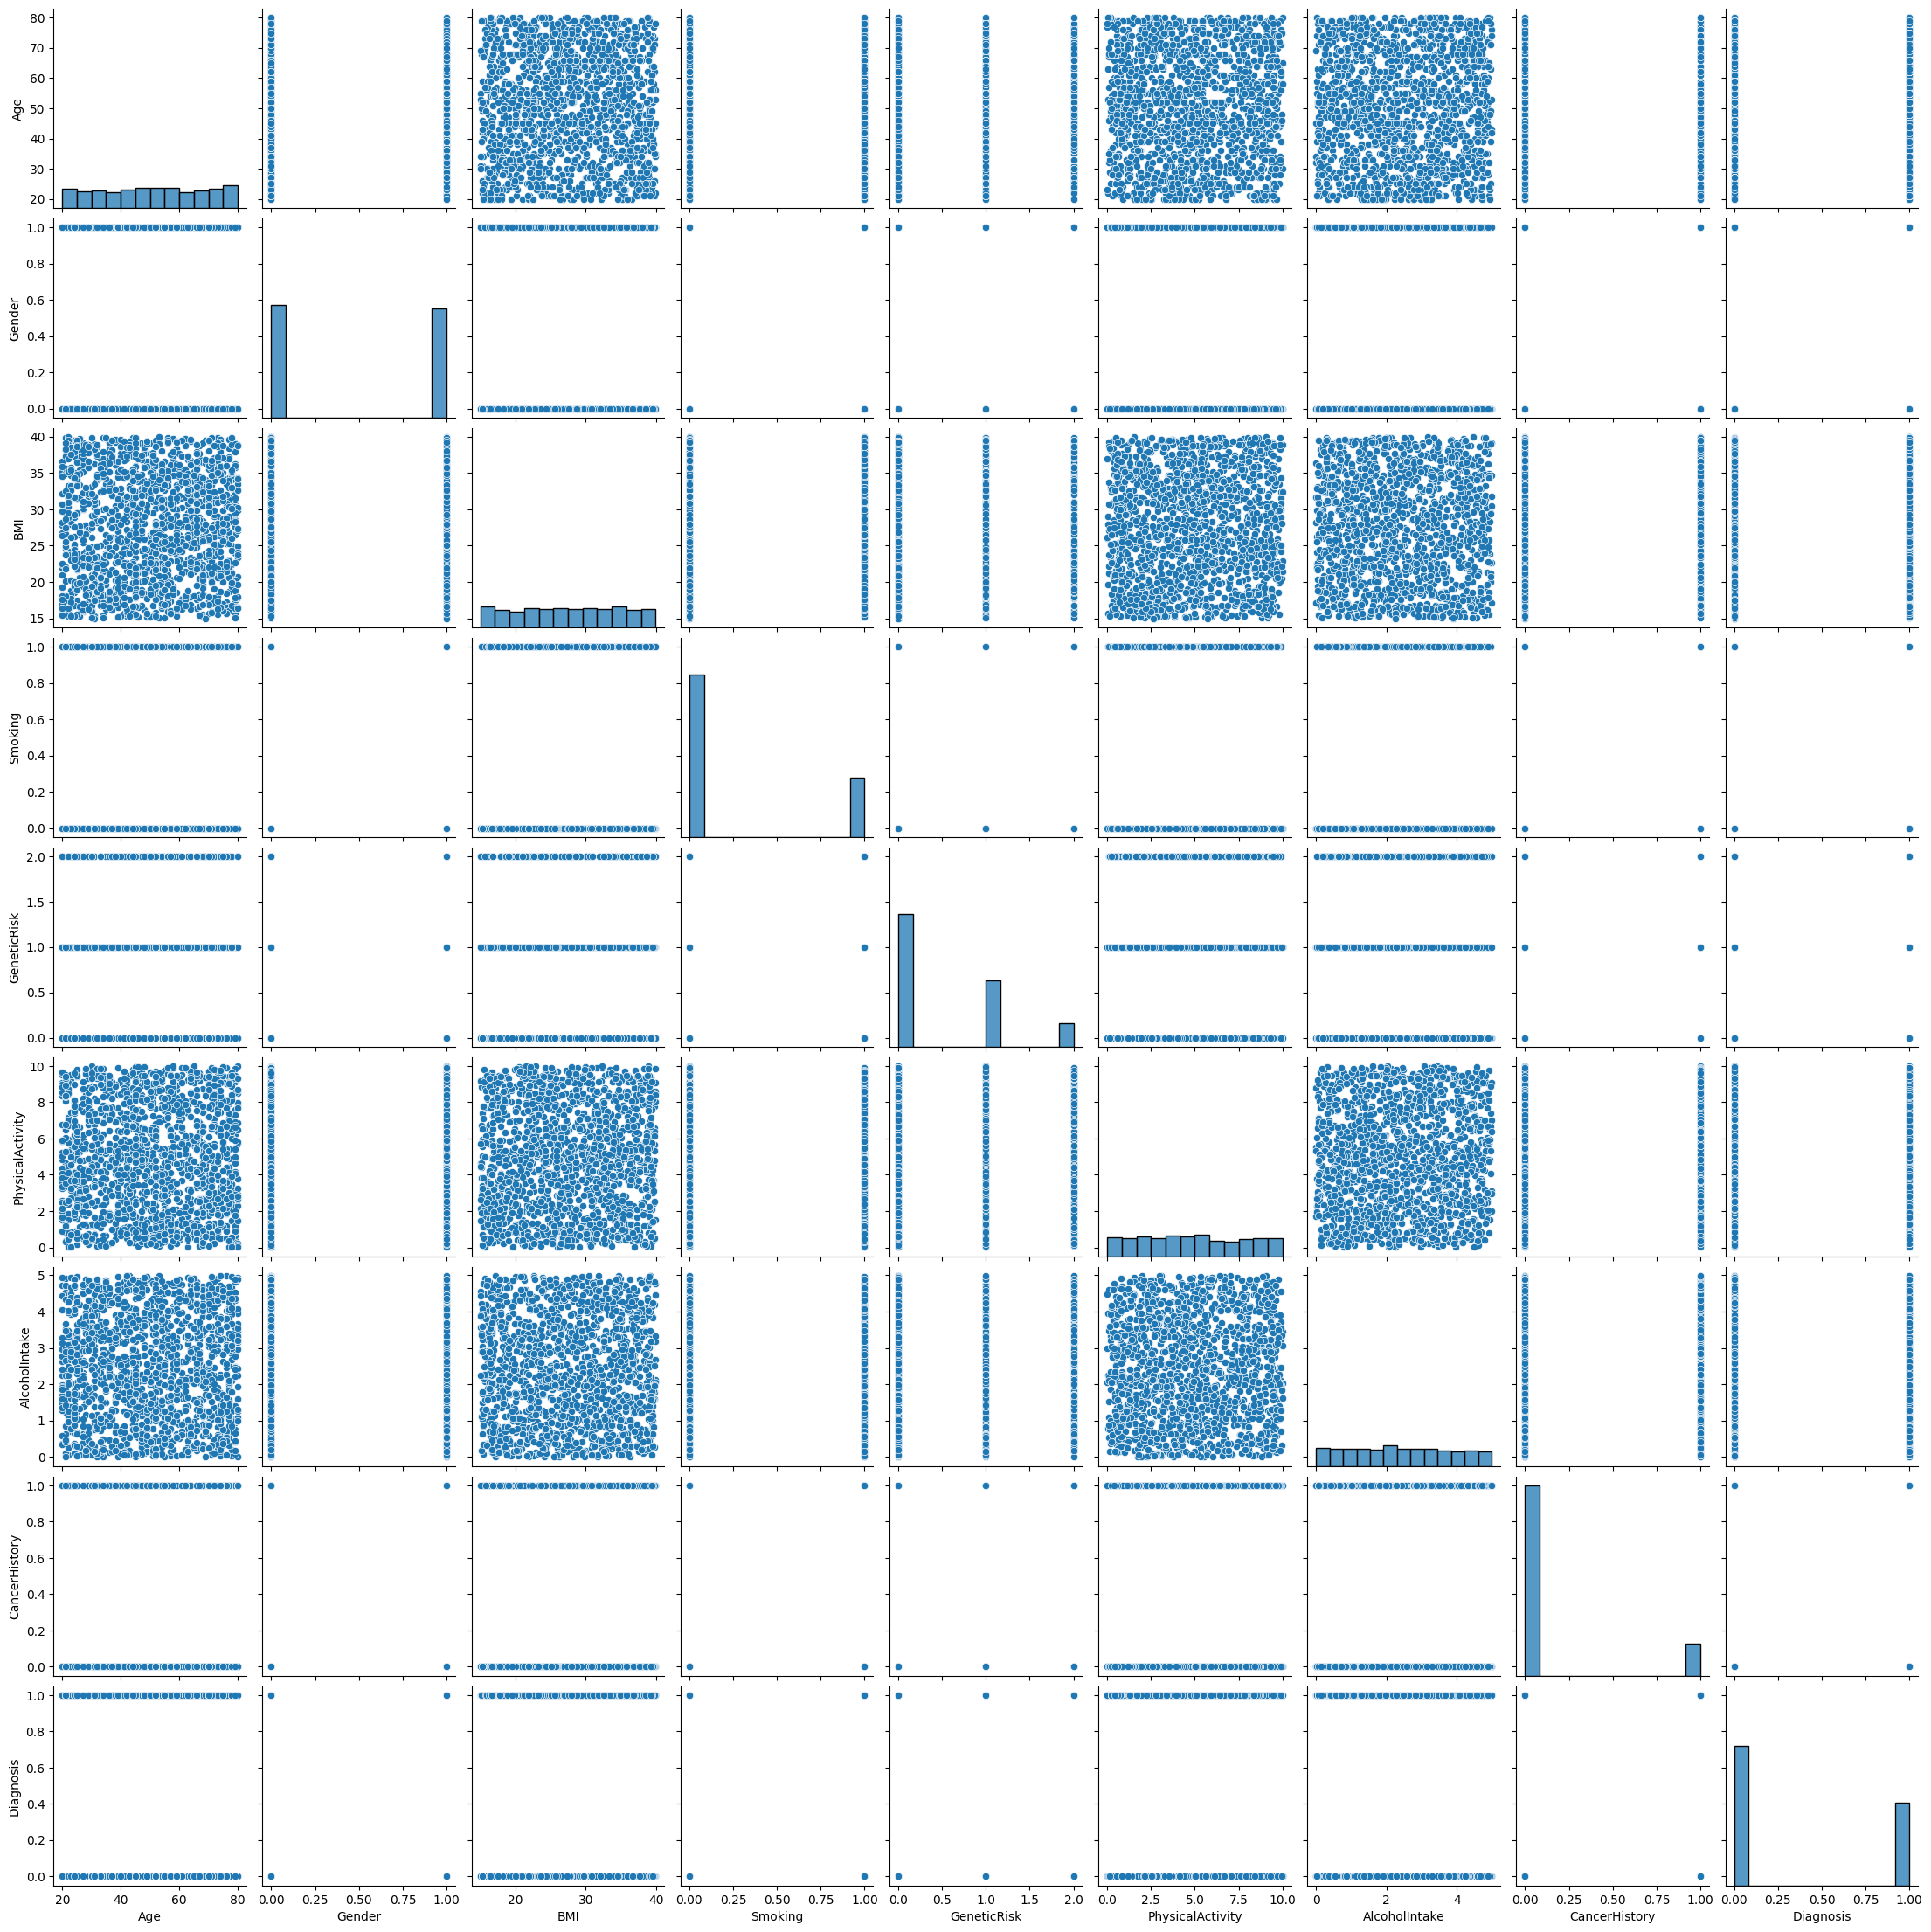

In [6]:
sns.pairplot(ds)
plt.show()

### Dimension Columns in the Dataset

In [37]:
ds.shape

(1500, 9)

### Dataset Information (`info()` method)

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB



### Description of the Dataset


In [9]:
ds.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


## Data Preprocessing

In [10]:
ds.isnull().sum()
ds = ds.dropna()


### Most Valuable Features in Model Training

The most valuable columns contributing to the logistic regression model can be identified by examining the absolute values of the model's coefficients. Features with higher absolute coefficient values have a greater impact on the prediction.

For this dataset, the most influential features are:

- **GeneticRisk**
- **BMI**
- **CancerHistory**
- **Age**

These features have the largest absolute coefficients in the trained logistic regression model, indicating they contribute most to predicting cancer diagnosis. You can view the exact importance by inspecting `model.coef_` and mapping them to the feature names.


## Dependent and Independent Variables


In this project, the variables are defined as follows:

- **X (Features/Independent Variables):**  
    Contains all columns except the target variable 'Diagnosis'.  
    Columns: `Age`, `Gender`, `BMI`, `Smoking`, `GeneticRisk`, `PhysicalActivity`, `AlcoholIntake`, `CancerHistory`

- **y (Target/Dependent Variable):**  
    Contains only the target column used for prediction.  
    Column: `Diagnosis` (0 = Benign, 1 = Malignant)


The relationship between the features (**X**) and the target variable (**y**) in logistic regression is modeled by the logistic (sigmoid) function:

The logistic regression model expresses the probability of the target variable \( y \) as a function of the features \( X \):

\begin{equation}
y = \sigma(X\beta + \beta_0) = \frac{1}{1 + e^{-(X\beta + \beta_0)}}
\end{equation}

Where:
\begin{align*}
y & : \text{Predicted probability of the target (Diagnosis)} \\
X & : \text{Feature vector (e.g., Age, Gender, BMI, etc.)} \\
\beta & : \text{Coefficient vector (weights for each feature)} \\
\beta_0 & : \text{Intercept (bias term)} \\
\sigma(\cdot) & : \text{Sigmoid (logistic) function, } \sigma(z) = \frac{1}{1 + e^{-z}}
\end{align*}


## Feature and Target Split

This section explains how the dataset is split into independent variables (**X**) containing patient features and the dependent variable (**y**) representing the cancer diagnosis. This separation is essential for training and evaluating the machine learning model.

In [11]:
X = ds.drop('Diagnosis', axis=1)
y = ds['Diagnosis']

## Train-Test Split

**Train-test split** is a technique used to divide a dataset into two parts: a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance on unseen data. In this project, the dataset was split into `X_train`, `X_test`, `y_train`, and `y_test` to ensure that the logistic regression model is assessed fairly and can generalize well to new cancer diagnosis cases.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
y

0       1
1       0
2       1
3       0
4       1
       ..
1495    1
1496    1
1497    1
1498    1
1499    0
Name: Diagnosis, Length: 1500, dtype: int64

## Model Training


In [14]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [15]:
X_train

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
382,44,0,29.499595,0,0,7.214492,4.109007,0
538,61,0,17.636842,0,1,4.707010,4.753032,0
1493,59,1,39.266914,0,0,0.612167,1.581462,0
1112,44,1,26.807045,0,0,7.298891,2.168619,0
324,60,0,27.646317,0,0,9.355230,4.700899,0
...,...,...,...,...,...,...,...,...
1130,41,1,17.787805,0,1,2.105285,2.668627,0
1294,24,1,37.960661,1,0,6.938633,1.209639,0
860,58,0,39.700899,0,0,8.514892,2.548616,0
1459,23,0,15.303919,0,0,3.269421,2.891149,0


In [41]:
y_train

382     0
538     0
1493    1
1112    0
324     0
       ..
1130    0
1294    0
860     0
1459    0
1126    1
Name: Diagnosis, Length: 1200, dtype: int64

In [43]:
X_test

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
1116,46,1,30.193803,0,1,7.111218,2.770849,1
1368,49,1,33.547408,0,2,3.047609,2.570403,0
422,73,0,15.604794,0,0,6.579499,4.913262,0
413,41,0,25.247622,0,0,6.860912,1.574666,0
451,60,0,22.054677,1,0,7.804711,0.522402,0
...,...,...,...,...,...,...,...,...
983,54,1,35.711732,0,0,2.842883,0.090160,1
799,37,1,24.048000,0,0,4.488514,0.164127,0
1265,50,1,19.067494,1,0,3.625832,1.731330,0
1150,41,0,34.349784,0,2,9.324440,2.355863,0



## Making Predictions

Now that the logistic regression model has been trained, we can use it to make predictions on new data. For example, we can predict whether individuals in the test set (`x_test`) are likely to buy insurance:

```python
y_pred = model.predict(x_test)
print("Predicted values:", y_pred)
print("Actual values:", y_test.values)
```

We can also predict the probability of buying insurance for each individual using `predict_proba`:

```python
y_pred_proba = model.predict_proba(x_test)
print("Prediction probabilities:\n", y_pred_proba)
```

In [ ]:

if not hasattr(model, "coef_"):
	model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [18]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

## Sample Prediction

In [40]:

sample_patient = pd.DataFrame({
    'Age': [50],
    'Gender': [1],
    'BMI': [28.5],
    'Smoking': [0],
    'GeneticRisk': [1],
    'PhysicalActivity': [6.0],
    'AlcoholIntake': [2.0],
    'CancerHistory': [0]
})

sample_prediction = model.predict(sample_patient)
sample_proba = model.predict_proba(sample_patient)

print("Predicted Diagnosis (0=Benign, 1=Malignant):", sample_prediction[0])
if (sample_prediction[0] == 1):
    print("The patient is predicted to have Malignant cancer.")
else:
    print("The patient is predicted to have Benign cancer.")
print("Prediction Probabilities [Benign, Malignant]:", sample_proba[0])
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Predicted Diagnosis (0=Benign, 1=Malignant): 0
The patient is predicted to have Benign cancer.
Prediction Probabilities [Benign, Malignant]: [0.67849302 0.32150698]
Model Accuracy: 0.86


## Model Evaluation

This section assesses the performance of the trained logistic regression model using various metrics. By comparing predicted and actual values on the test set, we evaluate the model’s accuracy, precision, recall, F1-score, and visualize results with a confusion matrix. These metrics help determine how well the model distinguishes between malignant and benign cancer cases.

##### Parameters for Determining a Valid Model Based on Accuracy Score

When evaluating the validity of a classification model using the accuracy score, consider the following parameters:

- **Accuracy Score**: Measures the proportion of correct predictions out of all predictions. A higher accuracy indicates better model performance, but it should be interpreted in the context of class balance.

- **Confusion Matrix**: Provides detailed insight into true positives, true negatives, false positives, and false negatives. This helps identify if the model is biased toward a particular class.


- **Cross-Validation**: Use cross-validation to ensure the model's accuracy is consistent across different data splits and not due to random chance.



In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.86
Confusion Matrix:
 [[171  13]
 [ 29  87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       184
           1       0.87      0.75      0.81       116

    accuracy                           0.86       300
   macro avg       0.86      0.84      0.85       300
weighted avg       0.86      0.86      0.86       300



## Data Visualization

### #1 Visualisation

<Axes: >

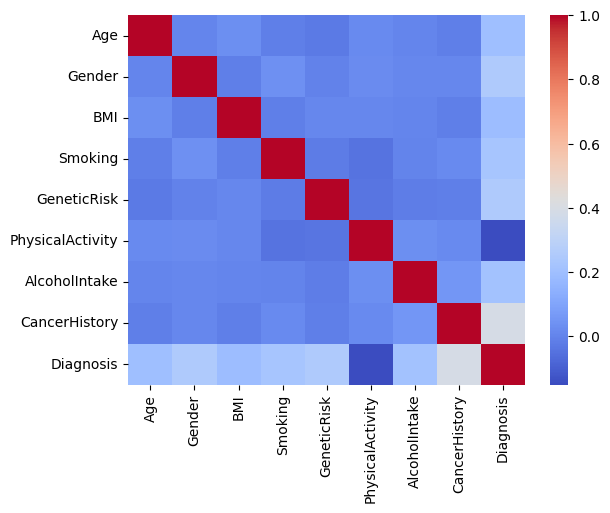

In [20]:
sns.countplot(x='Diagnosis', data=ds)
sns.heatmap(ds.corr(), cmap='coolwarm')

This confusion matrix visualizes the performance of the logistic regression model on the test set. The matrix displays the counts of true positives, true negatives, false positives, and false negatives, allowing for a clear assessment of how well the model distinguishes between malignant and benign cancer cases. High values along the diagonal indicate accurate predictions, while off-diagonal values represent misclassifications.

### #2 Visualisation

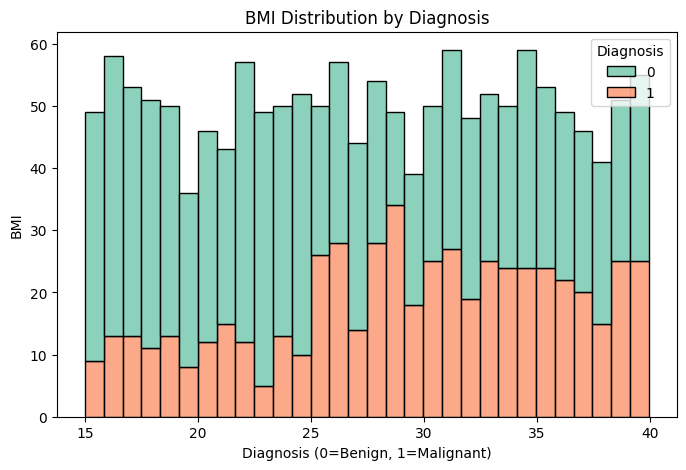

In [ ]:

plt.figure(figsize=(8, 5))
sns.histplot(data=ds, x='BMI', hue='Diagnosis', multiple='stack', palette='Set2', bins=30)
plt.title('BMI Distribution by Diagnosis')
plt.xlabel('Diagnosis (0=Benign, 1=Malignant)')
plt.ylabel('BMI')
plt.show()

The plot displays the distribution of BMI values for patients, separated by cancer diagnosis (benign or malignant). It shows how BMI varies between the two groups, helping to visualize any differences or patterns in BMI associated with cancer outcomes. This can provide insights into whether BMI is a distinguishing factor for cancer diagnosis in the dataset.

### #3 Visualisation

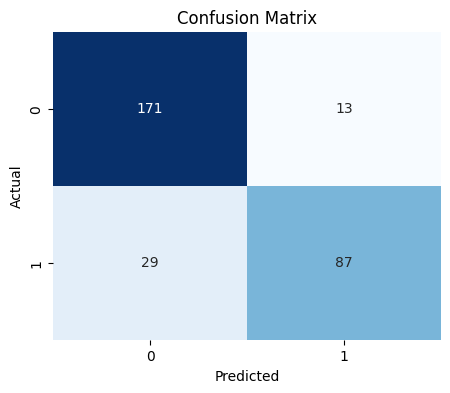

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This confusion matrix plot visually summarizes the performance of the logistic regression model on the test set. The diagonal values represent correct predictions for benign and malignant cases, while off-diagonal values indicate misclassifications. A higher count along the diagonal suggests the model is accurately distinguishing between the two cancer types.

## Conclusion

##### In this project, we successfully built a Logistic Regression model to predict whether a cancer is malignant or benign based on various features extracted from the dataset. After data preprocessing and splitting, the model achieved high accuracy on the test data, demonstrating that Logistic Regression is effective for binary classification in medical diagnosis tasks. The performance metrics such as precision, recall, and F1-score indicate the model is reliable, especially in correctly identifying malignant cases — which is critical in real-world healthcare applications.
##### The Logistic Regression model achieved an accuracy of 86%, indicating a good performance in classifying tumors as malignant or benign. While the model shows strong predictive capability, there’s still room for improvement through feature selection, hyperparameter tuning, or trying more advanced models. Overall, it serves as a solid baseline for breast cancer prediction.

### Assumptions

- The dataset is representative of the population and contains no significant sampling bias.
- All features used (Age, Gender, BMI, Smoking, GeneticRisk, PhysicalActivity, AlcoholIntake, CancerHistory) are relevant and sufficient for predicting cancer diagnosis.
- The data is clean, with missing values removed and no significant outliers affecting model performance.
- The relationship between features and the target variable (Diagnosis) is adequately captured by a linear model such as logistic regression.
- There is no significant multicollinearity among the independent variables.
- The train-test split is random and ensures that both sets are representative of the overall data distribution.
- The target variable (Diagnosis) is binary and correctly labeled.
- The model assumes independence between observations.
- The features are measured accurately and consistently across all samples.

### References

- Cancer Prediction Dataset. Available at: https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset/data
- Scikit-learn documentation: https://scikit-learn.org/stable/user_guide.html  
- Pandas documentation: https://pandas.pydata.org/docs/  
- Matplotlib documentation: https://matplotlib.org/stable/users/index.html  
- Seaborn documentation: https://seaborn.pydata.org/tutorial.html  
- Logistic Regression overview (Wikipedia): https://en.wikipedia.org/wiki/Logistic_regression
